#  <span style="color:#3D6AF2; text-align: center;">Aplicación de Red Neural Convolucional en detección de cancer de piel</span>

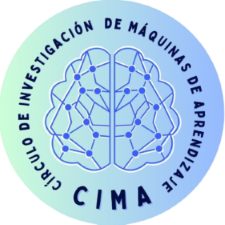

### <span style="color:#088315; text-align: center;">Alumna: Carla Andrea Chavez Paucar</span>

<p style="font-size: 16px;">Los árboles de clasificación son una técnica de aprendizaje supervisado, utilizada para predecir la <strong>clase o categoría</strong> de una variable objetivo basada en varias variables de entrada. Su estructura jerárquica divide los datos en subconjuntos basándose en criterios de decisión, representados en nodos y ramas, hasta llegar a una conclusión en los nodos hoja, donde se asigna la clase final. Los árboles de clasificación son intuitivos y fáciles de interpretar, ya que simulan un proceso de toma de decisiones en pasos secuenciales

##  <span style="color:#3D6AF2; text-align: center;">Descripción del modelo</span>

<p style="font-size: 16px;">En este proyecto, se ha implementado un modelo de red neuronal convolucional (CNN) utilizando Keras, una API de alto nivel para construir modelos de Machine Learning en TensorFlow. El modelo está diseñado para clasificar imágenes médicas de lesiones como benignas o malignas. Específicamente, el modelo tiene la siguiente arquitectura:

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">
<strong>1. Capa convolucional (Convolution2D): </strong>Esta capa aplica filtros a las imágenes de entrada para detectar características esenciales de las imágenes, como bordes, texturas y patrones. En este caso, se utilizan 32 filtros de tamaño 3x3.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">
<strong>2. Capa de agrupamiento (MaxPooling2D):</strong> Reduce las dimensiones espaciales de las imágenes para disminuir la cantidad de parámetros y la complejidad computacional.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">
<strong>3. Capa de aplanamiento (Flatten):</strong> Convierte la salida de las capas anteriores en un vector unidimensional que se pueda alimentar a una capa densa.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">
<strong>4. Capas densas (Dense): </strong>Estas capas están completamente conectadas. En la primera capa densa, se utilizan 128 neuronas, luego 50 neuronas y finalmente una sola neurona para la salida, utilizando una activación sigmoid, ya que se trata de un problema de clasificación binaria (maligno o benigno).

<p style="font-size: 16px;">El modelo se compila utilizando el optimizador Adam y la entropía cruzada binaria como función de pérdida.

<p style="font-size: 16px;">La <strong>entropía cruzada binaria (o binary crossentropy)</strong> es una función de pérdida utilizada para problemas de clasificación binaria, como en este caso, donde tenemos dos clases: maligno (1) y benigno (0).

<p style="font-size: 16px;">En términos sencillos, la entropía cruzada mide la "diferencia" o el "error" entre lo que el modelo predice y la realidad (el valor verdadero) para cada ejemplo. En el contexto de clasificación binaria, el modelo genera una probabilidad (entre 0 y 1) de que una imagen pertenezca a la clase positiva (en este caso, "maligno"). La entropía cruzada binaria cuantifica cuán alejada está esa probabilidad de la clase real para cada ejemplo.

##  <span style="color:#3D6AF2; text-align: center;">Caso de estudio</span>

<p style="font-size: 16px;"> El caso de estudio está centrado en la detección de lesiones malignas en imágenes médicas, específicamente, imágenes de cáncer de piel. Utilizando un conjunto de datos de imágenes etiquetadas como benignas y malignas, el objetivo es entrenar un modelo capaz de predecir si una nueva imagen de lesión corresponde a una condición benigna o maligna.

<p style="font-size: 16px;">Este tipo de clasificación es crucial para la detección temprana de cáncer de piel, ayudando a los médicos a realizar diagnósticos más rápidos y precisos.


[Datos disponibles aquí](https://drive.google.com/drive/folders/1Vyx2zFc_BWzklqFK4iINAFJg8wtp7-5S?usp=sharing)

<p style="font-size: 16px;">En la data de prueba:

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">data\test\benign tiene 360 imagenes y data\test\malignant tiene 300 imagenes

<p style="font-size: 16px;">Para la data de entrenamiento:
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">data\train\benign tiene 1440 imagenes y data\train\malignant tiene 1197 imagenes

<p style="font-size: 16px;">En total tenemos 3297 imagenes

<p style="font-size: 16px;">Los datos utilizados en este proyecto se encuentran en la carpeta data, que está organizada en dos subcarpetas: train y test. Estas carpetas ya han sido separadas para facilitar el entrenamiento y la evaluación del modelo. Dentro de cada una de ellas, hay dos subcarpetas adicionales:

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"> benign: Contiene imágenes de lesiones benignas (no cancerígenas).

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"> malignant: Contiene imágenes de lesiones malignas (cancerígenas).

<p style="font-size: 16px;">Las imágenes están en formato JPG y tienen un tamaño estándar de 224x224 píxeles, que es comúnmente utilizado en modelos de visión por computadora. Este formato permite que las imágenes sean procesadas y analizadas de manera eficiente para entrenar el modelo.

###  <span style="color:#3D6AF2; text-align: center;">Crear y entrenar el modelo</span>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

import cv2
import numpy as np

<p style="font-size: 16px;">Este fragmento de código importa las bibliotecas y clases necesarias para construir y entrenar una red neuronal convolucional (CNN) utilizando TensorFlow y Keras.

<p style="font-size: 16px;"><strong>1. TensorFlow y Keras:</strong>

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>Sequential:</u> Importa el modelo secuencial de Keras, que es un modelo en el que las capas se apilan de manera lineal, una sobre otra.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>Dense:</u> Importa la capa densa, que es una capa completamente conectada donde cada neurona está conectada a todas las neuronas de la capa anterior.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>Convolution2D:</u> Importa la capa convolucional 2D, que es fundamental para las redes neuronales convolucionales (CNN). Esta capa aplica filtros a las imágenes para detectar características como bordes, texturas, etc.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>MaxPooling2D:</u> Importa la capa de agrupamiento (pooling), que reduce la dimensionalidad de las imágenes, ayudando a disminuir la complejidad computacional.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>Flatten:</u> Importa la capa de aplanamiento, que convierte las salidas de las capas anteriores en un solo vector unidimensional que puede ser utilizado por las capas densas.

<p style="font-size: 16px;"><strong>2. Bibliotecas adicionales:</strong>

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>cv2:</u> Es la librería OpenCV para procesamiento de imágenes, que permite leer y modificar imágenes, en este caso, cargando imágenes para entrenar el modelo.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><u>numpy:</u> Es una librería de Python para trabajar con arreglos multidimensionales (matrices), que se utilizan para representar las imágenes y las etiquetas en el modelo de machine learning.

<p style="font-size: 16px;">Se crea un modelo secuencial. En este tipo de modelo, las capas se apilan una tras otra en un orden lineal:

In [2]:
modelo=Sequential()

<p style="font-size: 16px;"><strong>Capa convolucional:</strong>

<p style="font-size: 16px;">Se añade una capa convolucional con 32 filtros de tamaño 3x3.
    
    modelo.add(Convolution2D(32, (3,3), input_shape=(224,224,3), activation='relu'))

<p style="font-size: 16px;">especificar que las imágenes de entrada tienen un tamaño de 224x224 píxeles y 3 canales de color (RGB):
    
    input_shape=(224, 224, 3) 
    
<p style="font-size: 16px;">La función de activación ReLU se utiliza para introducir no linealidad en el modelo, ayudando a mejorar el rendimiento del mismo.
    
    activation='relu'

In [4]:
modelo.add(Convolution2D(32, (3,3),input_shape=(224,224,3),activation='relu'))

<p style="font-size: 16px;"><strong>Capa de agrupamiento (pooling):</strong>

<p style="font-size: 16px;">Esta capa realiza un max pooling para reducir las dimensiones espaciales de la imagen (es decir, reducir el tamaño de la imagen manteniendo la información más importante).
    
    modelo.add(MaxPooling2D(pool_size=(2, 2)))


<p style="font-size: 16px;">aplica un agrupamiento de 2x2 píxeles:
    
    pool_size=(2, 2)

In [3]:
modelo.add(MaxPooling2D(pool_size=((2,2))))

<p style="font-size: 16px;"><strong>Aplanado de la salida:</strong>

<p style="font-size: 16px;">Convierte la salida de la capa de pooling en un vector unidimensional para que pueda ser alimentado en las capas densas.
    
    modelo.add(Flatten())

In [4]:
modelo.add(Flatten())

<p style="font-size: 16px;"><strong>Capas densas (fully connected):</strong>

<p style="font-size: 16px;">Añade una capa densa con 128 neuronas y la función de activación ReLU.
    
    modelo.add(Dense(128, activation='relu'))


<p style="font-size: 16px;">Añade otra capa densa con 50 neuronas y la función de activación ReLU.
    
    modelo.add(Dense(50, activation='relu'))

In [6]:
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(50,activation='relu'))

<p style="font-size: 16px;"><strong>Capa de salida:</strong>

<p style="font-size: 16px;">La capa de salida tiene una sola neurona y utiliza la función de activación sigmoid para producir una salida entre 0 y 1, la cual es adecuada para clasificación binaria (benigno o maligno).
    
    modelo.add(Dense(1, activation='sigmoid'))

In [7]:
modelo.add(Dense(1,activation='sigmoid'))

<p style="font-size: 16px;"><strong>Compilación del modelo:</strong>

<p style="font-size: 16px;">Se compila el modelo con el optimizador Adam, que es eficiente para el ajuste de parámetros.
    
    modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<p style="font-size: 16px;">Se utiliza la entropía cruzada binaria como función de pérdida, adecuada para problemas de clasificación binaria:
    
    loss='binary_crossentropy'
    
<p style="font-size: 16px;">La métrica que se utilizará para evaluar el rendimiento del modelo durante el entrenamiento será la precisión.
    
    metrics=['accuracy']

In [8]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Preparación de los datos:


<p style="font-size: 16px;">Se inicializan listas vacías para almacenar las imágenes de entrenamiento (x_train), sus etiquetas (y_train), las imágenes de prueba (x_test) y sus etiquetas (y_test).
    

In [9]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

<p style="font-size: 16px;">Se inicializa una lista vacía que probablemente se usará más adelante para almacenar los datos de entrenamiento (imágenes y sus etiquetas).


In [10]:
dataTr=[]

<p style="font-size: 16px;"><strong>Cargar imágenes de entrenamiento:</strong>

<p style="font-size: 16px;">Encuentra todos los archivos .jpg en la carpeta malignant dentro de train.
    
    glob.glob(os.path.join('data/train/malignant', '*.jpg'))


<p style="font-size: 16px;">Lee la imagen desde el archivo:
    
    cv2.imread(filename) 
    
<p style="font-size: 16px;">Para cada imagen en la carpeta malignant, se asigna la etiqueta 1 (maligna) y se agrega a la lista dataTr junto con la imagen leída:
    
    dataTr.append([1, cv2.imread(filename)])
    
<p style="font-size: 16px;">El proceso se repite para las imágenes de la carpeta benign, pero en este caso la etiqueta es 0 (benigna).

In [11]:
import glob
import os
for filename in glob.glob(os.path.join('data/train/malignant','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('data/train/benign','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

<p style="font-size: 16px;"><strong>Mezclar los datos:</strong>

<p style="font-size: 16px;">Se mezclan aleatoriamente las imágenes y sus etiquetas, lo que ayuda a evitar que el modelo aprenda patrones no deseados de orden en los datos.
    
    shuffle(dataTr)

In [12]:
from random import shuffle
shuffle(dataTr)

<p style="font-size: 16px;"><strong>Separar las imágenes y etiquetas para el entrenamiento:</strong>

<p style="font-size: 16px;"> Itera sobre cada par de etiqueta y imagen en dataTr.
    
    for i, j in dataTr:


<p style="font-size: 16px;">Se agrega la etiqueta de la imagen (maligna o benigna) a la lista y_train.
    
    y_train.append(i)
    
<p style="font-size: 16px;">Se agrega la imagen a la lista x_train.
    
    x_train.append(j)

In [13]:
for i,j in dataTr:
    y_train.append(i)
    x_train.append(j)

<p style="font-size: 16px;"><strong>Convertir las listas en arreglos NumPy:</strong>

<p style="font-size: 16px;">Convierte las listas de imágenes y etiquetas en arreglos NumPy para que puedan ser utilizadas en el entrenamiento del modelo.
    
    x_train = np.array(x_train) y y_train = np.array(y_train)

In [14]:
x_train=np.array(x_train)
y_train=np.array(y_train)

<p style="font-size: 16px;"><strong>Cargar imágenes de prueba:</strong>

<p style="font-size: 16px;">Similar a la parte de entrenamiento, se cargan las imágenes de la carpeta test/malignant y test/benign, y se asignan sus respectivas etiquetas (1 para maligna y 0 para benigna).
Las imágenes y sus etiquetas se almacenan en las listas x_test y y_test

In [15]:
for filename in glob.glob(os.path.join('data/test/malignant','*.jpg')):
    x_test.append(cv2.imread(filename))
    y_test.append(1)

for filename in glob.glob(os.path.join('data/test/benign','*.jpg')):
    x_test.append(cv2.imread(filename))
    y_test.append(0)
    

<p style="font-size: 16px;"><strong>Convertir las listas de prueba en arreglos NumPy:</strong>

<p style="font-size: 16px;">Al igual que con los datos de entrenamiento, las listas de prueba se convierten en arreglos NumPy.
    
    x_test = np.array(x_test) y y_test = np.array(y_test)


In [16]:
x_test = np.array(x_test)
y_test = np.array(y_test)

## Entrenamiento del modelo

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><strong>modelo.fit()</strong> es el método que se usa para entrenar el modelo con los datos proporcionados. Acepta varias opciones que permiten personalizar el proceso de entrenamiento.

<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><strong>x_train:</strong>  Son las imágenes de entrenamiento, que se utilizarán para enseñar al modelo.
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><strong>y_train:</strong>  Son las etiquetas correspondientes a las imágenes de entrenamiento (0 para benigno, 1 para maligno), y se utilizan para ajustar los pesos del modelo durante el entrenamiento.
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><strong>batch_size=32:</strong>  El tamaño de batch define cuántas imágenes serán procesadas a la vez antes de que se actualicen los pesos del modelo. En este caso, el modelo procesará 32 imágenes en cada paso antes de actualizar sus pesos.
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;"><strong>epochs=60:</strong>  Un epoch es una iteración completa sobre todo el conjunto de datos de entrenamiento. En este caso, el modelo se entrenará durante 60 épocas, lo que significa que procesará el conjunto de entrenamiento 60 veces. Un mayor número de épocas puede mejorar el rendimiento, pero también puede llevar a sobreajuste (overfitting) si es demasiado alto.
    
<p style="font-size: 16px;">validation_data permite especificar un conjunto de datos para evaluar el rendimiento del modelo durante el entrenamiento, sin que este influya en el ajuste de los pesos. x_test y y_test son el conjunto de imágenes y etiquetas de prueba, respectivamente. Durante el entrenamiento, el modelo evaluará su precisión en estos datos al final de cada época para medir su capacidad de generalización (es decir, su desempeño en datos no vistos).
    

In [17]:
modelo.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_test, y_test))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5328 - loss: 316.6030 - val_accuracy: 0.4545 - val_loss: 156.3789
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5818 - loss: 67.2928 - val_accuracy: 0.5788 - val_loss: 24.0175
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6268 - loss: 26.7422 - val_accuracy: 0.7182 - val_loss: 6.6707
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6587 - loss: 16.9269 - val_accuracy: 0.6470 - val_loss: 11.5133
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7184 - loss: 7.7661 - val_accuracy: 0.7576 - val_loss: 3.3776
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6793 - loss: 8.4730 - val_accuracy: 0.6000 - val_loss: 17.6582
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6819 - loss: 8.8327 - val_accuracy: 0.6818 - val_loss: 6.7411
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6300 - loss: 15.7766 - val_accuracy

83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7834 - loss: 0.4638 - val_accuracy: 0.7636 - val_loss: 0.5222
Epoch 52/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.7568 - loss: 0.4969 - val_accuracy: 0.7727 - val_loss: 0.4714
Epoch 53/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7748 - loss: 0.4870 - val_accuracy: 0.7121 - val_loss: 0.5995
Epoch 54/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7863 - loss: 0.4633 - val_accuracy: 0.7636 - val_loss: 0.4589
Epoch 55/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7848 - loss: 0.4609 - val_accuracy: 0.7818 - val_loss: 0.4573
Epoch 56/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7838 - loss: 0.4575 - val_accuracy: 0.7773 - val_loss: 0.4883
Epoch 57/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7871 - loss: 0.4578 - val_accuracy: 0.7803 - val_loss: 0.4674
Epoch 58/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7779 - loss: 0.4754 - val_accuracy: 0.7197 - val_l

<p style="font-size: 16px;">El modelo muestra una mejora gradual en la precisión (accuracy) durante las primeras épocas, alcanzando un valor de aproximadamente 79% en la etapa final, mientras que la pérdida (loss) disminuye considerablemente desde los primeros entrenamientos. Sin embargo, la precisión de validación parece estabilizarse alrededor del 75-78%, sugiriendo que el modelo ha alcanzado un punto de convergencia.

##  <span style="color:#3D6AF2; text-align: center;">Prediccion sobre una imagen de prueba</span>

<p style="font-size: 16px;"><strong>Carga de la imagen:</strong>

<p style="font-size: 16px;">Define la ruta a la imagen que se va a predecir. En este caso, es una imagen que está en la carpeta test/benign, lo que significa que la imagen es de una lesión benigna.
    
    ruta='data/test/benign/5.jpg'


<p style="font-size: 16px;">Utiliza OpenCV (cv2) para leer la imagen desde el archivo y almacenarla en la variable I.

    
    I = cv2.imread(ruta)

In [29]:
from IPython.display import Image

ruta='data/test/benign/16.jpg'
I = cv2.imread(ruta)

<p style="font-size: 16px;"><strong>Predicción del modelo:</strong>

<p style="font-size: 16px;">El modelo realiza una predicción sobre la imagen I:
    
    modelo.predict(np.array([I]))


<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">np.array([I]): Se convierte la imagen en un arreglo NumPy y se coloca dentro de una lista para que el modelo la pueda procesar correctamente
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">El método predict() devuelve la probabilidad de que la imagen pertenezca a cada clase (en este caso, benigno o maligno). Como la salida es un arreglo bidimensional, [0][0] accede al valor de la probabilidad para la clase "maligna".
    
<p style="font-size: 16px;"><p style="font-size: 16px; text-indent: 20px;">round(modelo.predict(np.array([I]))[0][0])==1: La predicción del modelo devuelve un valor entre 0 (BENIGNO) y 1 (MALIGNO). round() redondea el valor a 0 o 1:
    
<p style="font-size: 16px;">Image(filename=ruta): Finalmente, la imagen especificada en ruta se muestra en el Jupyter Notebook usando la función Image() de IPython.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
La lesion es benigna[]


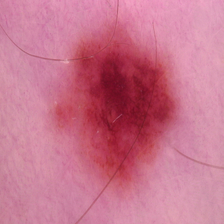

In [30]:
if round(modelo.predict(np.array([I]))[0][0])==1:
    print("La lesion es maligna[]")

else:
    print("La lesion es benigna[]")

Image(filename=ruta)